In [123]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [124]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Data Cleaning

In [125]:
baseline_return = pd.read_csv("/content/drive/MyDrive/Portfolio Optimization [Fintech ML]/Model Performance/baseline_return.csv", parse_dates=["Date"]).set_index("Date")
ml_return = pd.read_csv("/content/drive/MyDrive/Portfolio Optimization [Fintech ML]/Model Performance/ML_return.csv", parse_dates=["Date"]).set_index("Date")
rl_cum_return = pd.read_csv("/content/drive/MyDrive/Portfolio Optimization [Fintech ML]/Model Performance/RL_cum_return.csv", parse_dates=["Date"]).set_index("Date")
baseline_maxret_return = pd.read_csv("/content/drive/MyDrive/Portfolio Optimization [Fintech ML]/Model Performance/baseline_maxret_return.csv", parse_dates=["Date"]).set_index("Date")
ml_maxret_return = pd.read_csv("/content/drive/MyDrive/Portfolio Optimization [Fintech ML]/Model Performance/ML_maxret_return.csv", parse_dates=["Date"]).set_index("Date")


In [126]:
baseline_return.head()

,0
Date,
2016-01-04,-0.024579
2016-01-05,0.004562
2016-01-06,-0.018165
2016-01-07,-0.023864
2016-01-08,0.003067


In [127]:
ml_return.head()

,0
Date,
2016-01-04,-0.017145
2016-01-05,-0.017219
2016-01-06,-0.024412
2016-01-07,-0.030735
2016-01-08,-0.004131


In [128]:
baseline_maxret_return.head()

,0
Date,
2016-01-04,-0.004740
2016-01-05,0.013778
2016-01-06,-0.010199
2016-01-07,0.023289
2016-01-08,-0.022913


In [129]:
ml_maxret_return.head()

,0
Date,
2016-01-04,-0.015680
2016-01-05,0.004562
2016-01-06,-0.018165
2016-01-07,-0.034783
2016-01-08,0.003067


In [130]:
rl_return = (rl_cum_return - rl_cum_return.shift(1)) / rl_cum_return.shift(1)
rl_return.iloc[0,0] = rl_cum_return.iloc[0,0] - 1
rl_return.head()

,0
Date,
2016-01-04,-0.008424
2016-01-05,0.012767
2016-01-06,-0.013735
2016-01-07,-0.008776
2016-01-08,-0.016936


In [131]:
model_performance = pd.concat([baseline_return, ml_return, rl_return], axis = 1)
model_performance.columns = ["Baseline", "ML", "RL"]
model_performance.head()

,Baseline,ML,RL
Date,,,
2016-01-04,-0.024579,-0.017145,-0.008424
2016-01-05,0.004562,-0.017219,0.012767
2016-01-06,-0.018165,-0.024412,-0.013735
2016-01-07,-0.023864,-0.030735,-0.008776
2016-01-08,0.003067,-0.004131,-0.016936


In [132]:
model_performance_maxret = pd.concat([baseline_maxret_return, ml_maxret_return, rl_return], axis = 1)
model_performance_maxret.columns = ["Baseline", "ML", "RL"]
model_performance_maxret.head()

,Baseline,ML,RL
Date,,,
2016-01-04,-0.004740,-0.015680,-0.008424
2016-01-05,0.013778,0.004562,0.012767
2016-01-06,-0.010199,-0.018165,-0.013735
2016-01-07,0.023289,-0.034783,-0.008776
2016-01-08,-0.022913,0.003067,-0.016936


In [133]:
def summary_statistics(portfolio_returns: pd.DataFrame):
  final_cumulative_returns = (1 + portfolio_returns).prod() - 1
  days_passed = (portfolio_returns.index[-1] - portfolio_returns.index[0]).days
  annualized_returns = ((final_cumulative_returns + 1) ** (365 / days_passed)) - 1
  annualized_volatility = portfolio_returns.std() * np.sqrt(252)
  cum_return = (portfolio_returns+1).cumprod()

  return pd.DataFrame({
      "Annualized Returns": map(lambda x: f"{x}%",round(annualized_returns * 100,2)),
      "Annualized Volatility": map(lambda x: f"{x}%",round(annualized_volatility * 100,2)),
      "Return to Risk Ratio": round(annualized_returns / annualized_volatility,4),
      "Maximum Drawdown": map(lambda x: f"{x}%",-round(np.ptp(cum_return)/cum_return.max() * 100,2))
  })

# Analysis (Maximising Return Risk Ratio)

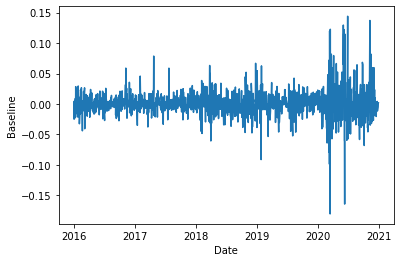

In [134]:
# Daily Returns for baseline portfolio
sns.lineplot(x = model_performance.index, y=model_performance["Baseline"])

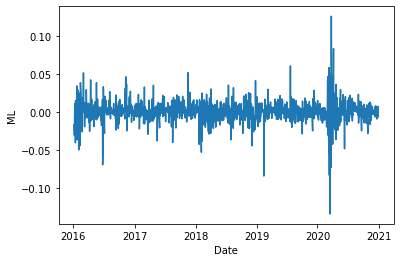

In [135]:
# Daily Returns for ML portfolio
sns.lineplot(x = model_performance.index, y=model_performance["ML"])

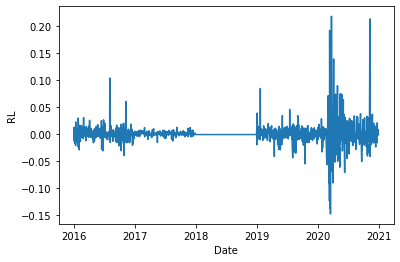

In [136]:
# Daily Returns for RL portfolio
sns.lineplot(x = model_performance.index, y=model_performance["RL"])

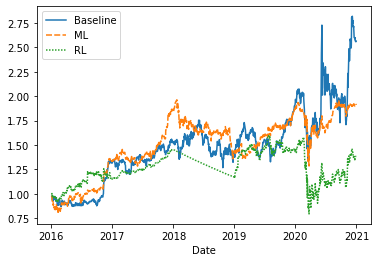

In [137]:
# Cumulative returns
sns.lineplot(data = (1 + model_performance).cumprod())

In [138]:
summary_statistics(model_performance)

,Annualized Returns,Annualized Volatility,Return to Risk Ratio,Maximum Drawdown
Baseline,20.76%,36.83%,0.5636,-71.78%
ML,13.85%,23.3%,0.5943,-103.05%
RL,6.7%,31.71%,0.2113,-126.74%


# Analysis (Maximising Return with maximum expected volatility of 10%)

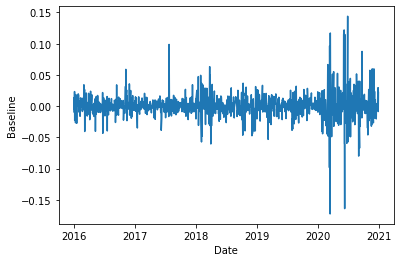

In [139]:
# Daily Returns for baseline portfolio
sns.lineplot(x = model_performance_maxret.index, y=model_performance_maxret["Baseline"])

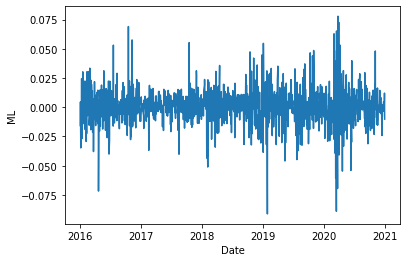

In [140]:
# Daily Returns for ML portfolio
sns.lineplot(x = model_performance_maxret.index, y=model_performance_maxret["ML"])

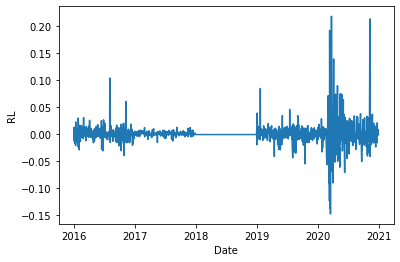

In [141]:
# Daily Returns for RL portfolio
sns.lineplot(x = model_performance_maxret.index, y=model_performance_maxret["RL"])

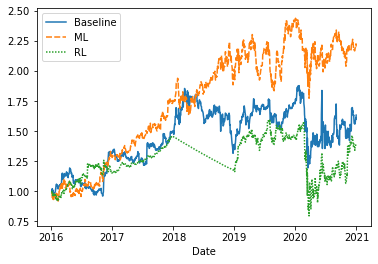

In [142]:
# Cumulative returns
sns.lineplot(data = (1 + model_performance_maxret).cumprod())

In [143]:
summary_statistics(model_performance)

,Annualized Returns,Annualized Volatility,Return to Risk Ratio,Maximum Drawdown
Baseline,10.31%,31.35%,0.3290,-87.42%
ML,17.12%,24.94%,0.6866,-67.35%
RL,6.7%,31.71%,0.2113,-102.81%
